기울기: [4.7081605  0.33925123]
절편: -57.98765891838086


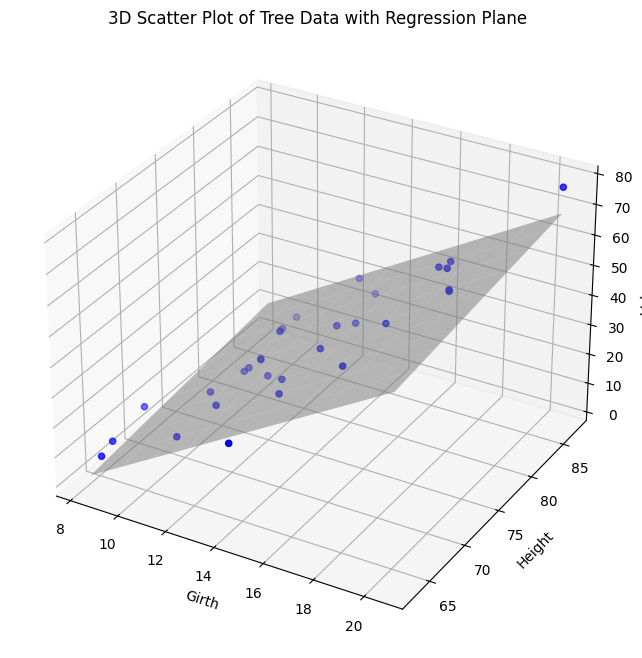

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

treeDF = pd.read_csv('data/trees.csv')

x = treeDF[['Girth', 'Height']].values
y = treeDF['Volume'].values.reshape(-1, 1) # Reshape for sklearn

model = LinearRegression()
model.fit(x, y)

coef = model.coef_[0]
intercept = model.intercept_[0]
print(f"기울기: {coef}")
print(f"절편: {intercept}")

pred = model.predict(x)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(treeDF['Girth'], treeDF['Height'], treeDF['Volume'], c='blue', marker='o', label='Actual Volume')

girth_range = np.linspace(treeDF['Girth'].min(), treeDF['Girth'].max(), 10)
height_range = np.linspace(treeDF['Height'].min(), treeDF['Height'].max(), 10)

G, H = np.meshgrid(girth_range, height_range)

Z = intercept + coef[0] * G + coef[1] * H

ax.plot_surface(G, H, Z, alpha=0.5, color='gray', label='Regression Plane')

ax.set_xlabel('Girth')
ax.set_ylabel('Height')
ax.set_zlabel('Volume')
ax.set_title('3D Scatter Plot of Tree Data with Regression Plane')
plt.show()